<a href="https://colab.research.google.com/github/Salgadoalan/Proyecto-2/blob/main/carac_socio_eco_Pueblaipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving concentradohogar.csv to concentradohogar.csv


In [3]:
df = pd.read_csv('concentradohogar.csv')

import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import skew, kurtosis

#Mediante un análisis exploratorio obtendremos las características socio-demográficas de  Puebla.

In [4]:
#Del Csv, definimos df_puebla como los registros correspondientes a Puebla con clave de entidad 21. Mostrando únicamente las observaciones de este estado.


df_puebla = df[df['ubica_geo'].astype(str).str[:2] == '21']

num_observaciones, num_variables = df_puebla.shape
print(f"El archivo contiene {num_observaciones} observaciones y {num_variables} variables.")
df_puebla

El archivo contiene 2175 observaciones y 126 variables.


,folioviv,foliohog,ubica_geo,tam_loc,est_socio,est_dis,upm,factor,clase_hog,sexo_jefe,...,mater_serv,material,servicio,deposito,prest_terc,pago_tarje,deudas,balance,otras_erog,smg
57850,2100002402,1,21114,1,2,335,6579,640,3,2,...,0.0,0.00,0.00,20543.47,0.00,0.0,0.00,0.0,0.0,15558.3
57851,2100002403,1,21114,1,2,335,6579,640,1,1,...,0.0,0.00,0.00,175.10,0.00,0.0,0.00,0.0,0.0,15558.3
57852,2100002405,1,21114,1,2,335,6579,640,2,1,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,15558.3
57853,2100041401,1,21114,1,3,336,6580,582,3,2,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,15558.3
57854,2100041402,1,21114,1,3,336,6580,582,1,1,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,15558.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60020,2161821808,1,21039,4,1,352,6815,598,2,2,...,0.0,0.00,0.00,1377.04,0.00,0.0,0.00,0.0,0.0,15558.3
60021,2161821809,1,21039,4,1,352,6815,598,3,1,...,0.0,0.00,0.00,0.00,0.00,0.0,393.44,0.0,0.0,15558.3
60022,2161821810,1,21039,4,1,352,6815,598,2,1,...,1475.4,1475.40,0.00,1180.32,147.54,0.0,0.00,0.0,0.0,15558.3
60023,2161821811,1,21039,4,1,352,6815,598,2,1,...,737.7,393.44,344.26,2950.81,0.00,0.0,0.00,0.0,0.0,15558.3


#Gráfica del nivel de estudios del jefe del hogar por cada entidad.

<ipython-input-5-d34e50e74a20>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_puebla['educa_jefe_desc'] = df_puebla['educa_jefe'].map(educa_jefe_map)


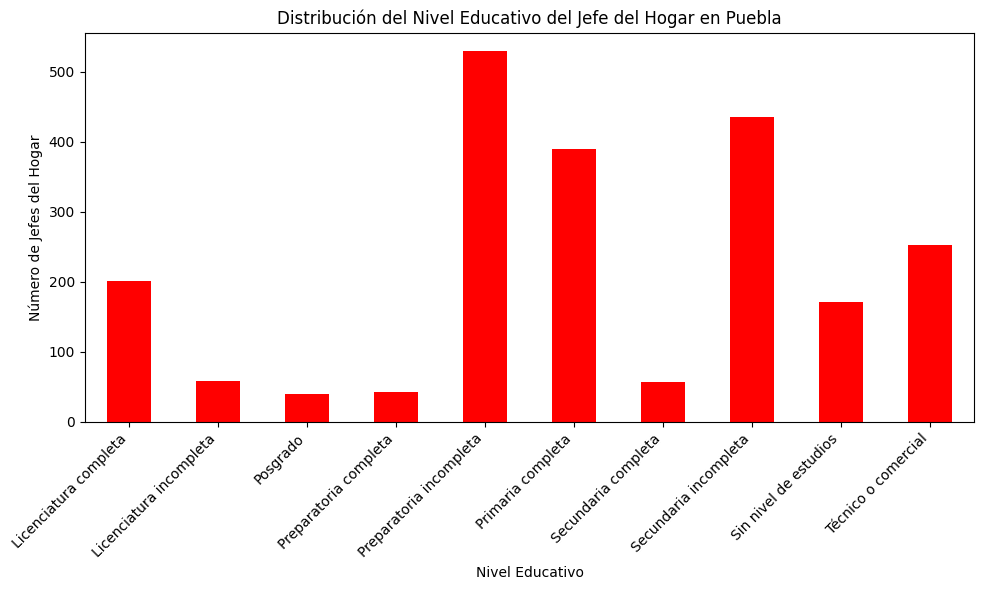

In [5]:
#utilizaremos seaborn para visualizar la distribución del nivel educativo del jefe de hogar en cada entidad.



# se crea un diccionario que mapea los valores numéricos de educa_jef
educa_jefe_map = {
    1: 'Sin nivel de estudios',
    2: 'Primaria incompleta',
    3: 'Primaria completa',
    4: 'Secundaria incompleta',
    5: 'Secundaria completa',
    6: 'Preparatoria incompleta',
    7: 'Preparatoria completa',
    8: 'Técnico o comercial',
    9: 'Licenciatura incompleta',
    10: 'Licenciatura completa',
    11: 'Posgrado'
}

#la función map toma los valores de la columna educa_jefe y los reemplaza con las descripciones definidas en el diccionario
df_puebla['educa_jefe_desc'] = df_puebla['educa_jefe'].map(educa_jefe_map)


#value_counts()esta función cuenta cuántas veces aparece cada categoría en la columna
#sort_index() ordena los resultados por el índice
niveles_estudios_puebla = df_puebla['educa_jefe_desc'].value_counts().sort_index()

#creamos la tabla
plt.figure(figsize=(10, 6))
niveles_estudios_puebla.plot(kind='bar', color='red')

#diseñamos la gráfica
plt.title('Distribución del Nivel Educativo del Jefe del Hogar en Puebla')
plt.ylabel('Número de Jefes del Hogar')
plt.xlabel('Nivel Educativo')
plt.xticks(rotation=45, ha='right')

# mostramos la gráfica
plt.tight_layout()
plt.show()


La gráfica que generamos muestra la distribución del nivel educativo del jefe del hogar en el estado de Puebla.


Eje horizontal (X): Muestra las categorías de nivel educativo del jefe del hogar, que han sido mapeadas de los valores de educa_jefe a descripciones más comprensibles. Las categorías van desde "Sin nivel de estudios" hasta "Posgrado", ordenadas de menor a mayor nivel educativo.

Eje vertical (Y): Indica el número de jefes de hogar en cada una de las categorías de nivel educativo. Cada barra representa cuántas personas alcanzaron ese nivel de estudios.

Analizando la gráfica podemos notar los detalles:

La **altura de cada barra refleja la cantidad de jefes de hogar que tienen un determinado nivel educativo.** Las barras más altas representan niveles de estudio más comunes, mientras que las más bajas indican niveles menos frecuentes.

Lo que se espera ver en la gráfica es:

Los niveles de educación básica (primaria y secundaria) tengan barras más altas, ya que estos suelen ser más comunes en la población general. Por otro lado, los niveles educativos más altos, como licenciatura y posgrado, tienden a ser menos frecuentes, por lo que se espera que esas barras sean más bajas.





#Tabla y una gráfica que muestre el ingreso promedio por estrato socio-económico en cada entidad.

In [6]:
#revisamos cuántos estratos socioeconómicos existen en total en la base de datos para Puebla asegurarnos de que no faltan valores importantes
print(df_puebla['est_socio'].unique())

[2 3 4 1]


In [7]:
# agrupamos por estrato socioeconómico y calculamos el ingreso promedio
ingreso_promedio = df_puebla.groupby('est_socio')['ing_cor'].mean().reset_index()

# Mostrar la tabla con el ingreso promedio por estrato socioeconómico
print(ingreso_promedio)

   est_socio       ing_cor
0          1  31823.775909
1          2  49505.066848
2          3  65827.514032
3          4  93006.672418


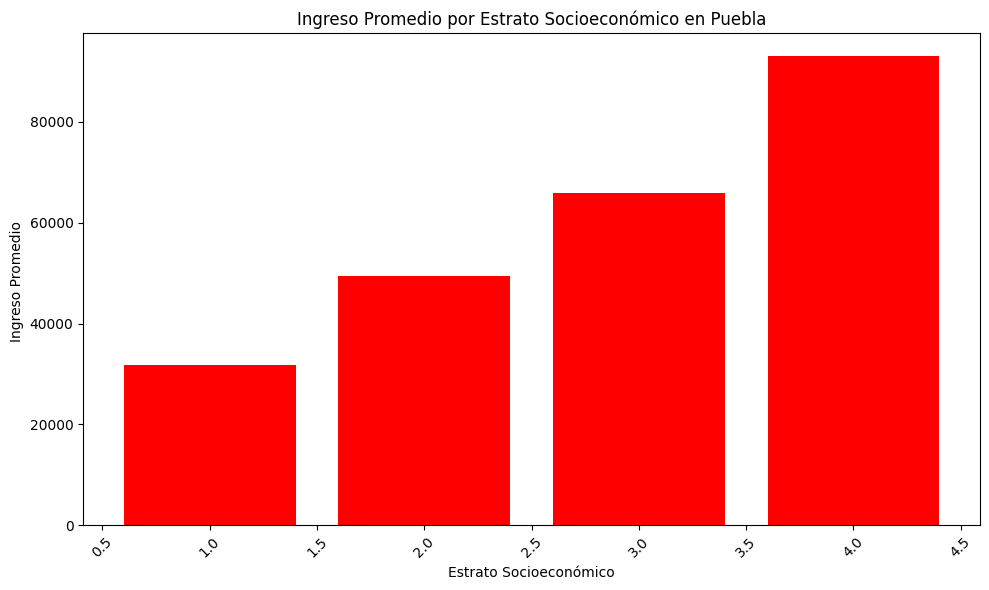

In [8]:
# Diseñamos la grafica de barras
plt.figure(figsize=(10, 6))
plt.bar(ingreso_promedio['est_socio'], ingreso_promedio['ing_cor'], color='red')
plt.title('Ingreso Promedio por Estrato Socioeconómico en Puebla')
plt.xlabel('Estrato Socioeconómico')
plt.ylabel('Ingreso Promedio ')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#Histograma por entidad del gasto corriente monetario.

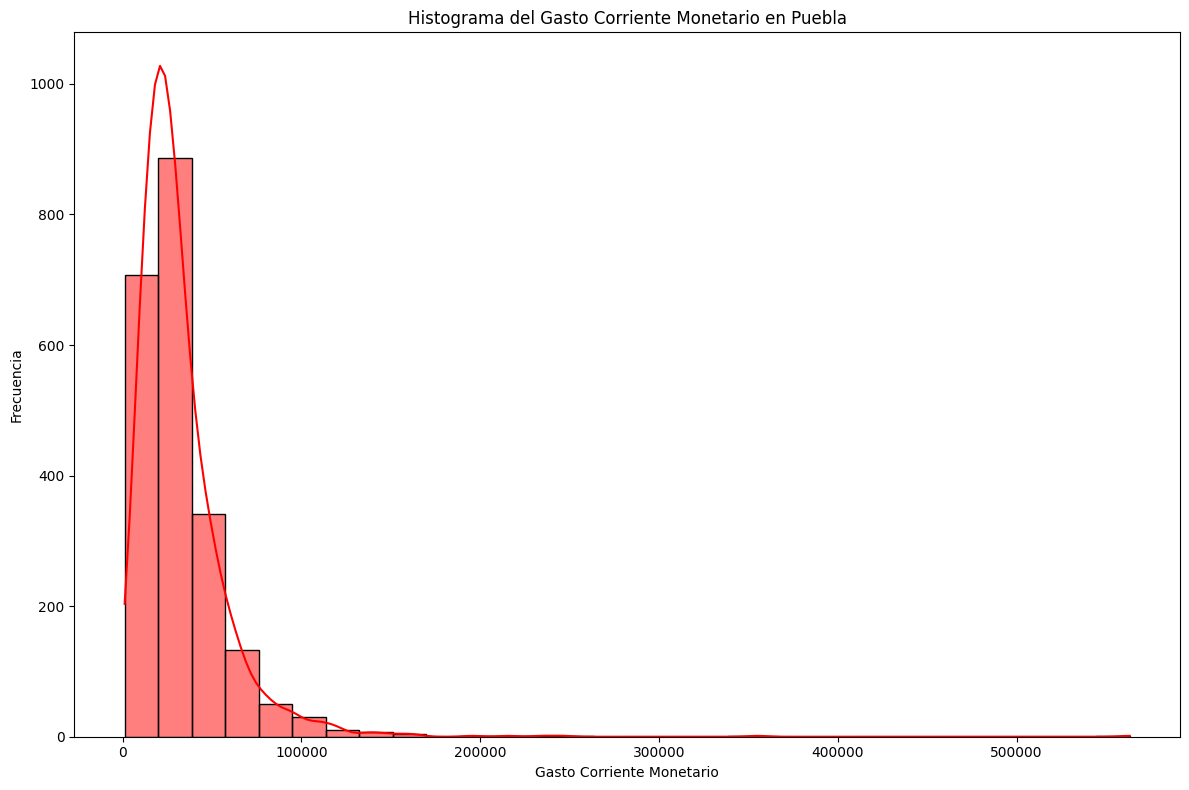

Asimetría del gasto corriente monetario en Puebla: 5.928310237341321
Curtosis del gasto corriente monetario en Puebla: 83.70306241189412
La distribución presenta asimetría positiva.
La distribución presenta leptocurtosis (picos afilados).


In [9]:



#Con sns.histplot generamos un histograma del gasto corriente monetario
#Y con kde=True agregamos una curva de densidad sobre el histograma para visualizar la distribución de los datos.
plt.figure(figsize=(12, 8))
sns.histplot(data=df_puebla, x='gasto_mon', bins=30, kde=True, color='red')

# diseñamos el gráfico
plt.title('Histograma del Gasto Corriente Monetario en Puebla')
plt.xlabel('Gasto Corriente Monetario')
plt.ylabel('Frecuencia')


plt.tight_layout()
plt.show()

#Para calcular la asimetría de la distribución del gasto usamos :skew
#kurtosis: Calcula la curtosis, que indica la forma de la distribución en términos de picos.
asimetria = skew(df_puebla['gasto_mon'].dropna())
curtosis_valor = kurtosis(df_puebla['gasto_mon'].dropna())

print(f"Asimetría del gasto corriente monetario en Puebla: {asimetria}")
print(f"Curtosis del gasto corriente monetario en Puebla: {curtosis_valor}")

# condiciones de la asimetría y curtosis
if asimetria > 0:
    print("La distribución presenta asimetría positiva.")
elif asimetria < 0:
    print("La distribución presenta asimetría negativa.")
else:
    print("La distribución es simétrica.")

if curtosis_valor > 3:
    print("La distribución presenta leptocurtosis (picos afilados).")
elif curtosis_valor < 3:
    print("La distribución presenta platicurtosis (picos más suaves).")
else:
    print("La distribución es mesocúrtica (similar a una normal).")



#Histograma del ingreso corriente del hogar por entidad según la escolaridad del jefe del hogar, también su densidad estimada.

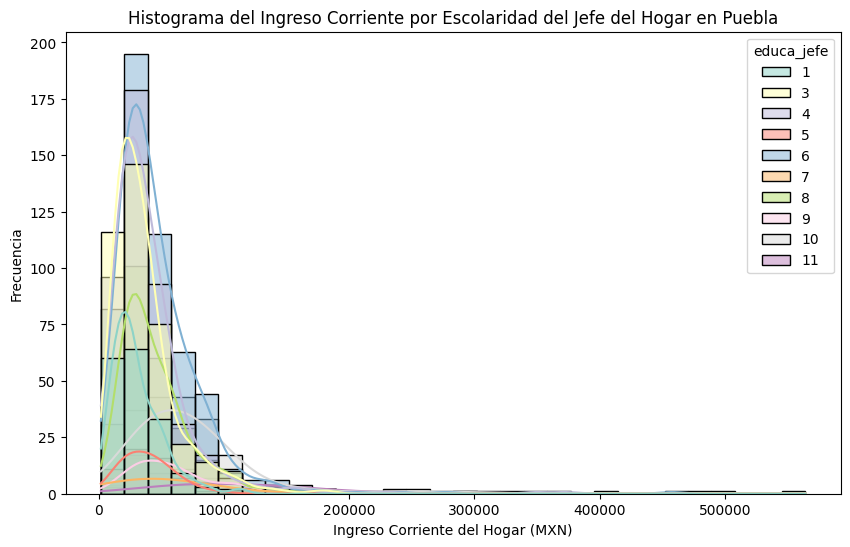

In [10]:


# creamos un histograma
plt.figure(figsize=(10, 6))

#hacemos el histograma con una línea de densidad estimada para visualizar la distribución suave de los datos
#la línea de densidad estimada proporciona una visión más clara de la distribución de los ingresos puede ayudar a visualizar mejor las áreas donde hay más frecuencia de ingresos,
#suavizando las variaciones que pueden ser más notorias en el histograma.

sns.histplot(data=df_puebla, x='ing_cor', hue='educa_jefe', kde= True, bins=30, palette = 'Set3')

# agregamos las etiquetas
plt.title('Histograma del Ingreso Corriente por Escolaridad del Jefe del Hogar en Puebla')
plt.xlabel('Ingreso Corriente del Hogar (MXN)')
plt.ylabel('Frecuencia')

#gráfica
plt.show()




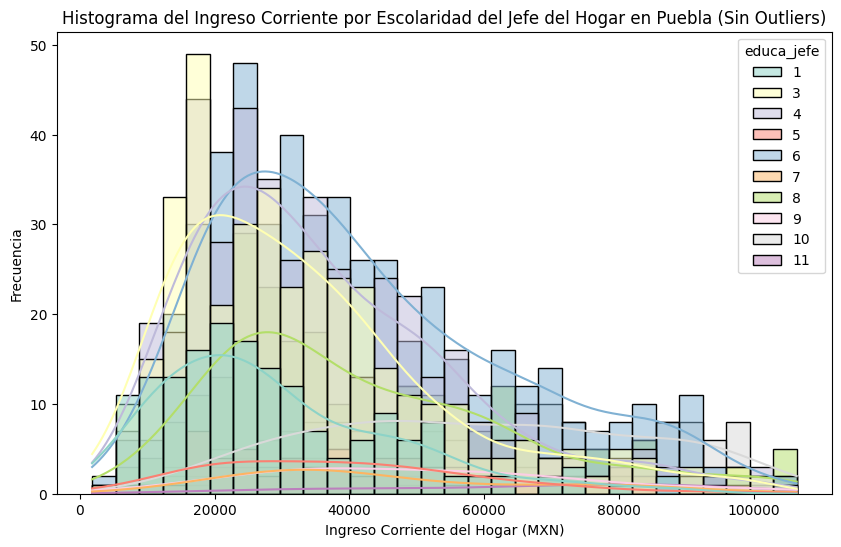

In [11]:


# gráfica sin outliers

# se hace el calculo de el primer cuartil (Q1) y el tercer cuartil (Q3) del ingreso corriente, y luego se eliminan los valores que están fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR].
Q1 = df_puebla['ing_cor'].quantile(0.25)
Q3 = df_puebla['ing_cor'].quantile(0.75)
IQR = Q3 - Q1

# filtra los outliers fuera de [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
df_puebla_sin_outliers = df_puebla[(df_puebla['ing_cor'] >= Q1 - 1.5 * IQR) & (df_puebla['ing_cor'] <= Q3 + 1.5 * IQR)]

# Creamos el histograma
plt.figure(figsize=(10, 6))

# histograma densidad estimada sin outliers
sns.histplot(data=df_puebla_sin_outliers, x='ing_cor', hue='educa_jefe', kde=True, bins=30, palette= 'Set3')

#  etiquetas
plt.title('Histograma del Ingreso Corriente por Escolaridad del Jefe del Hogar en Puebla (Sin Outliers)')
plt.xlabel('Ingreso Corriente del Hogar (MXN)')
plt.ylabel('Frecuencia')

# mostramos la gráfica
plt.show()

In [12]:
# calcula la desviación estándar del ingreso corriente por cada escolaridad
desviacion_por_categoria = df_puebla.groupby('educa_jefe')['ing_cor'].std()

# imprimos el resultado
print(f'La desviación estándar del ingreso corriente por cada categoría escolaridad es:{desviacion_por_categoria}')


La desviación estándar del ingreso corriente por cada categoría escolaridad es:educa_jefe
1     19566.615248
3     26091.048199
4     35032.694931
5     26189.831897
6     36132.464140
7     80413.223362
8     28425.999443
9     28779.355147
10    68450.090370
11    70562.638401
Name: ing_cor, dtype: float64


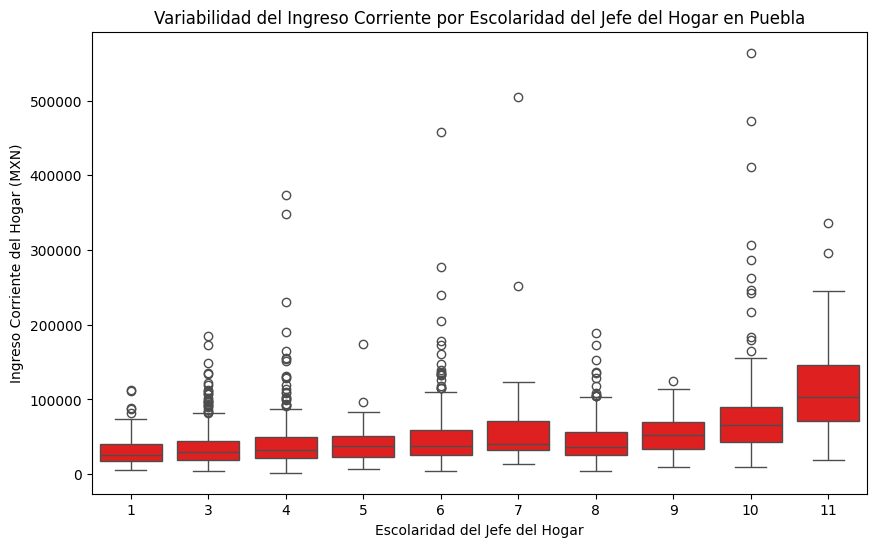

In [13]:


#este boxplot nos permitirá visualizar el rango intercuartílico y los posibles outliers
#para cada categoría de escolaridad, lo que facilita identificar la categoría con mayor dispersión.
plt.figure(figsize=(10, 6))
sns.boxplot(x='educa_jefe', y='ing_cor', data=df_puebla, color = 'red')
plt.title('Variabilidad del Ingreso Corriente por Escolaridad del Jefe del Hogar en Puebla')
plt.xlabel('Escolaridad del Jefe del Hogar')
plt.ylabel('Ingreso Corriente del Hogar (MXN)')
plt.show()

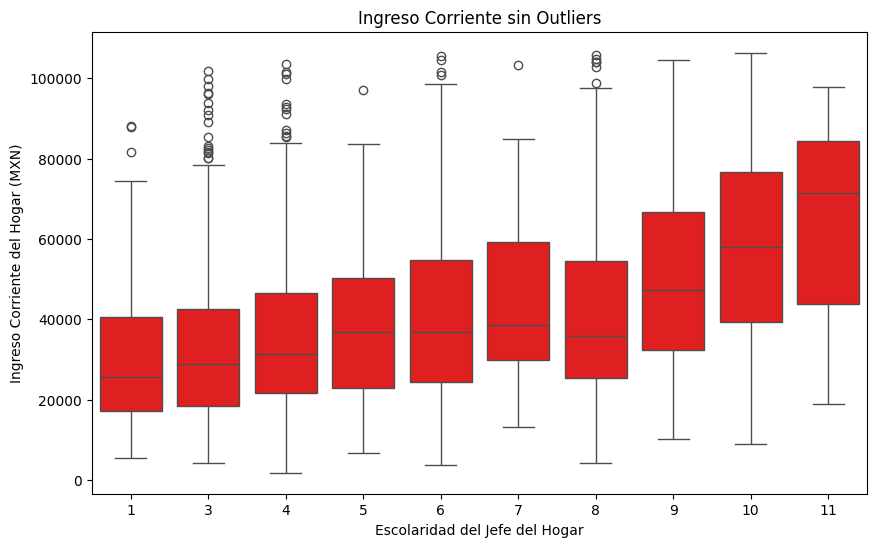

In [14]:
# a veces es útil realizar el análisis tanto con como sin los outliers para entender su impacto.
# definimos los límites para identificar outliers
Q1 = df_puebla['ing_cor'].quantile(0.25)
Q3 = df_puebla['ing_cor'].quantile(0.75)
IQR = Q3 - Q1

# definimos en df_puebla los outliers
df_sin_outliers = df_puebla[(df_puebla['ing_cor'] >= (Q1 - 1.5 * IQR)) & (df_puebla['ing_cor'] <= (Q3 + 1.5 * IQR))]

# graficamos sin outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='educa_jefe', y='ing_cor', data=df_sin_outliers, color = 'red')
plt.title('Ingreso Corriente sin Outliers')
plt.xlabel('Escolaridad del Jefe del Hogar')
plt.ylabel('Ingreso Corriente del Hogar (MXN)')
plt.show()

##Conclusiones
La categoría con mayor desviación estándar es la preparatoria incompleta (educa_jefe = 7) con 80,413.22 MXN. Esto indica que, aunque algunos hogares en esta categoría pueden tener ingresos altos, también hay otros con ingresos significativamente bajos, lo que sugiere una gran variabilidad en esta categoría.

Las categorías con menor desviación estándar son sin estudios (educa_jefe = 1) y primaria incompleta (educa_jefe = 3), con desviaciones estándar de 19,566.62 y 26,091.05 MXN, respectivamente.
 A pesar de que los hogares con un jefe de hogar más educado tienden a tener ingresos más altos, la alta variabilidad en estas categorías sugiere que no todos los individuos con educación superior tienen un ingreso elevado, lo que puede estar relacionado con factores como la ocupación, el sector económico y las oportunidades laborales en Puebla.
